## Narasi dan Soal Final Data Scientist

eFishery merupakan perusahaan akuakultur terbesar di Indonesia, yang berhasil
mengakuisisi lebih dari 300 ribu kolam pada akhir 2022. Salah satu hal yang membuat
eFishery unggul dari Startup lain adalah pemanfaatan data untuk menunjang bisnis
efishery mulai dari jualan pakan, penjual ikan, pengekspor udang, sampai financial.
Adapun data yang di collect selain manual dari orang lapangan baik itu aquaculture
maupun sales, juga memanfaatkan penggunaan AIoT Devices sebagai data collection
tanpa keterlibatan manusia.

Di efishery, data merupakan komponen penting dalam menunjang pertumbuhan bisnis,
sebab dengan data kita dapat membantu decision bisnis serta menjaga resiko dari
bisnis yang kita jalani. Namun ada tantangan dari pengumpulan data tersebut, yaitu
orang. Penggunaan orang untuk pengumpulan data sangatlah beresiko, sebab ada
potensi human error ataupun fraud. Oleh sebab itu efishery berupaya menciptakan alat
yang berguna untuk mengumpulan data yang menunjang bisnis efishery, atau bahkan
bisnis pembudidaya itu sendiri.

Salah satu alat yang sedang kita kembangkan adalah sensor auto Feeder. Sensor ini
terpasang dan mengirimkan sinyal aktivitas yang ada di kolam ikan secara realtime ke
sistem. Akan tetapi, data yang dikirimkan masih berupa data raw, dan butuh analisis
lebih lanjut sehingga dapat mengetahui insight lanjutan dari aktivitas di kolam.


### Import Library
Library Python ini sendiri merupakan kumpulan modul terkait berisi kumpulan kode yang dapat digunakan berulang kali dalam program yang berbeda. Library ini membuat Pemrograman Python lebih sederhana dan nyaman bagi programmer.

In [74]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from os import listdir
from os.path import isfile, join

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Import Datasets
Dataset merupakan kumpulan data-data mentah berupa tabel yang dapat dioleh lebih lanjut.Pada tahap ini saya menggabungkan semua dataset yang diberikan oleh pihak efishery yang berisi 7 file xlsx :
1. 051.xlsx
2. 101.xlsx
3. 102.xlsx
4. 103.xlsx
5. 161.xlsx
6. 162.xlsx
7. 163.xlsx

Menjadi 1 file csv dengan nama file ```dataset.csv```


In [75]:

folder_name = "datasets"
onlyfiles = [f for f in listdir("./"+folder_name) if isfile(join("./"+folder_name, f))]
onlyfiles
output = pd.DataFrame()
for i in onlyfiles:
    file_name = f"./{folder_name}/"+i
    df = pd.read_excel(io = file_name)
    output = pd.concat([output,df])
output.to_csv(folder_name+".csv",index=False)

### Data Cleaning and Data Exploration
Analisis data eksploratif (Exploratory Data Analysis – EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Eksplorasi data merupakan bagian yang integral dari persepsi kita.

In [76]:
df = pd.read_csv("datasets.csv")
df["timestamp"] = df["timestamp"].astype(str).str[:10]
df["timeepoch"] = df["timestamp"].str[5:].astype(int)
df['datetime'] = pd.to_datetime(df["timestamp"], unit='s')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
print("Showing Dataset :")
display(df.head())
print("Generate information about a DataFrame :")
print(df.info())
print("Generate descriptive statistics :")
display(df.describe())
print("Generate number of distinct elements :")
display(df.nunique())

Showing Dataset :


,timestamp,x,y,z,label,timeepoch,datetime,date,time
0,1657093314,3,239,34,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
1,1657093314,9,247,30,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
2,1657093314,8,252,31,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
3,1657093314,0,255,37,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
4,1657093314,-12,252,39,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54


Generate information about a DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  28392 non-null  object        
 1   x          28392 non-null  int64         
 2   y          28392 non-null  int64         
 3   z          28392 non-null  int64         
 4   label      28392 non-null  int64         
 5   timeepoch  28392 non-null  int32         
 6   datetime   28392 non-null  datetime64[ns]
 7   date       28392 non-null  object        
 8   time       28392 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(4), object(3)
memory usage: 1.8+ MB
None
Generate descriptive statistics :


,x,y,z,label,timeepoch
count,28392.000000,28392.000000,28392.000000,28392.000000,28392.000000
mean,-0.766484,245.575514,41.893738,0.500000,93769.340096
std,6.895088,8.203194,7.872899,0.500009,327.848389
min,-97.000000,169.000000,-48.000000,0.000000,93202.000000
25%,-2.000000,243.000000,38.000000,0.000000,93485.000000
50%,0.000000,246.000000,42.000000,0.500000,93769.000000
75%,1.000000,249.000000,45.000000,1.000000,94053.000000
max,190.000000,394.000000,352.000000,1.000000,94337.000000


Generate number of distinct elements :


timestamp    1136
x             119
y             120
z             116
label           2
timeepoch    1136
datetime     1136
date            1
time         1136
dtype: int64

In [77]:
df.groupby("label").describe()

x                                                        y  \
         count      mean       std   min  25%  50%  75%    max    count   
label                                                                     
0      14196.0 -0.730769  3.102511 -82.0 -2.0  0.0  0.0   48.0  14196.0   
1      14196.0 -0.802198  9.244442 -97.0 -5.0 -0.5  3.0  190.0  14196.0   

                   ...     z        timeepoch                            \
             mean  ...   75%    max     count          mean         std   
label              ...                                                    
0      245.794449  ...  43.0  300.0   14196.0  93812.307622  327.395058   
1      245.356579  ...  47.0  352.0   14196.0  93726.372570  322.639898   

                                                    
           min      25%      50%      75%      max  
label                                               
0      93258.0  93504.0  93777.0  94104.0  94337.0  
1      93202.0  93400.0  93704.0  94029.0  94246.0  

[2 rows x 32 columns]

### 1. Bagaimana cara mengetahui durasi makan ikan?

Dari data yang saya terima, saya mengambil rata-rata label (ikan tidak sedang makan dan ikan sedang makan) berdasarkan waktu data itu terjadi

,x,y,z,label,timeepoch
time,,,,,
07:40:02,-0.60,244.20,44.20,1.0,93202.0
07:40:03,-1.52,242.36,43.76,1.0,93203.0
07:40:04,-2.76,248.48,45.00,1.0,93204.0
07:40:05,-2.40,244.28,45.88,1.0,93205.0
07:40:06,-4.32,244.56,47.68,1.0,93206.0


<Axes: xlabel='time'>

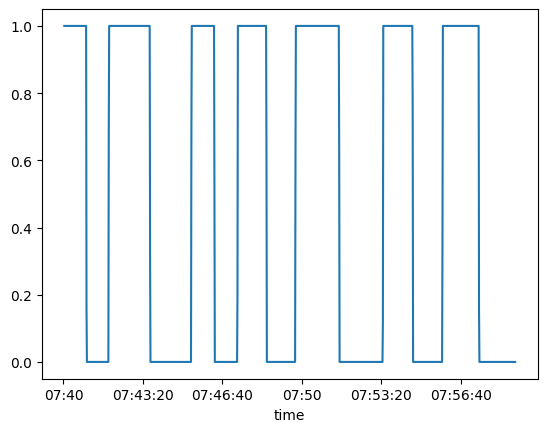

In [78]:
df_time = df.groupby("time").mean()
display(df_time.head())
df_time.label.plot()

Dari data rata-rata waktu ikan yang sedang makan, saya ambil nilai rata-rata di lebih besar 0.5 karena brt populasi ikan sedang makan sudah setengah atau lebih dari setengah

In [79]:
df_c = df_time[["label","timeepoch"]][df_time["label"] > 0.5].copy()
df_c.head()

,label,timeepoch
time,,
07:40:02,1.0,93202.0
07:40:03,1.0,93203.0
07:40:04,1.0,93204.0
07:40:05,1.0,93205.0
07:40:06,1.0,93206.0


Data ikan yang sedang makan saya kelompokan berdasarkan kumpulan data dengan interval waktu (event) tertentu sehingga saya dapati ada 7 cluster (event) waktu ikan sedang makan

<Axes: xlabel='timeepoch', ylabel='label'>

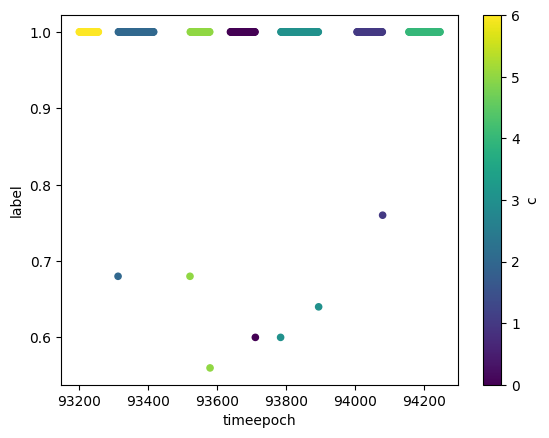

In [80]:
kmeans = KMeans(n_clusters= 7)
cluster = kmeans.fit_predict(df_c)
df_c["c"] = cluster
df_c
df_c.plot.scatter(x ="timeepoch", y="label", c="c", colormap='viridis')

Dari setiap cluster(event) di dapati data durasi makan ikan sebagai berikut :
- Durasi makan ikan tercepat rata-rata 55 detik
- Durasi makan ikan terlama rata-rata 110 detik
- Durasi makan ikan rata-rata 80 detik

In [81]:
df_time_range = df_c.copy().reset_index()
dtr = df_time_range.groupby("c").agg(
    time=('time', 'min'),
    mulai_makan=('timeepoch', 'min'),
    selesai_makan=('timeepoch', 'max')).sort_values("mulai_makan").set_index("time")
dtr["durasi_makan"] = (dtr["selesai_makan"] - dtr["mulai_makan"])
display(dtr)
dtr.describe()

,mulai_makan,selesai_makan,durasi_makan
time,,,
07:40:02,93202.0,93257.0,55.0
07:41:54,93314.0,93417.0,103.0
07:45:22,93522.0,93580.0,58.0
07:47:19,93639.0,93711.0,72.0
07:49:44,93784.0,93894.0,110.0
07:53:25,94005.0,94079.0,74.0
07:55:55,94155.0,94245.0,90.0


,mulai_makan,selesai_makan,durasi_makan
count,7.000000,7.000000,7.000000
mean,93660.142857,93740.428571,80.285714
std,348.422841,355.368286,21.359731
min,93202.000000,93257.000000,55.000000
25%,93418.000000,93498.500000,65.000000
50%,93639.000000,93711.000000,74.000000
75%,93894.500000,93986.500000,96.500000
max,94155.000000,94245.000000,110.000000


### 2. Jika anda telah mengetahui durasi makan ikan, dan pakan diberikan secara otomatis menggunakan autofeeder, jadwal yang digunakan untuk melakukan feeding seperti apa? 
(Asumsi: pakan yang diberikan seberat 5 kg pada setiap eventmakan)


Jika diasumsikan bemberian makan seberat pada 5kg atau 5000 gram, pembagian akan saya bagi berdasarkan persentase dari durasi makan ikan sehingga ikan dapat menerima alokasi makanan yang tepat 

In [82]:
df_schedule = dtr.copy()
print("Total Durasi makan :")
df_schedule.durasi_makan.sum()

Total Durasi makan :


562.0

In [83]:
print("Penentuan persentase pembagian makanan :")
df_schedule["persentase"] = (df_schedule["durasi_makan"] / 562)
df_schedule

Penentuan persentase pembagian makanan :


,mulai_makan,selesai_makan,durasi_makan,persentase
time,,,,
07:40:02,93202.0,93257.0,55.0,0.097865
07:41:54,93314.0,93417.0,103.0,0.183274
07:45:22,93522.0,93580.0,58.0,0.103203
07:47:19,93639.0,93711.0,72.0,0.128114
07:49:44,93784.0,93894.0,110.0,0.195730
07:53:25,94005.0,94079.0,74.0,0.131673
07:55:55,94155.0,94245.0,90.0,0.160142


Pengalokasian makanan dalam gram sesuai persentase durasi makan ikan dan jadwal ikan sedang makan:


,alokasi_makanan_gram
time,
07:40:02,489.0
07:41:54,916.0
07:45:22,516.0
07:47:19,641.0
07:49:44,979.0
07:53:25,658.0
07:55:55,801.0


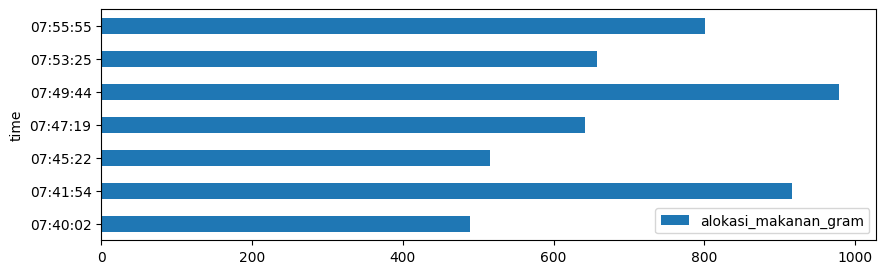

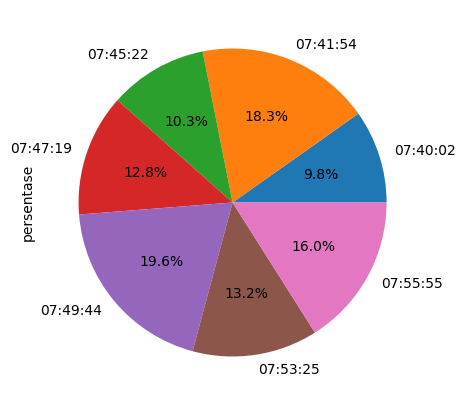

In [84]:
print("Pengalokasian makanan dalam gram sesuai persentase durasi makan ikan dan jadwal ikan sedang makan:")
df_schedule["alokasi_makanan_gram"] = round(df_schedule["persentase"] * 5000)
display(df_schedule[["alokasi_makanan_gram"]])
plot = df_schedule.plot.barh(y='alokasi_makanan_gram',figsize=(10, 3))
plot = df_schedule.plot.pie(y='persentase',legend=False, startangle=0, autopct='%1.1f%%',figsize=(5, 5))

Berdasarkan durasi makan ikan, dapat kita jadwalkan pemberian makan ikan berdasarkan jadwal dan pembagian seperti table diatas, sehingga makanan ikan dapat di serap oleh ikan lebih maksimal.

### 3. Dengan memanfaatkan data yang anda dapatkan, silahkan lakukan eksplorasi seluas-luasnya dan berikan hasil eksplorasi anda dalam bentuk report yang didukung oleh data-data dan referensi paper / buku jika perlu. Berikut ketentuan - ketentuannya

- Anda diperbolehkan membuat dummy data jika data yang diberikan kurang
cukup untuk mendukung eksplorasi anda
- Anda WAJIB menyertakan sumber jika menggunakan referensi dan data yang
tersedia secara public, dan wajib menuliskan DUMMY apabila anda membuat
data sendiri

In [85]:
display(df.head())
display(df.corr())

,timestamp,x,y,z,label,timeepoch,datetime,date,time
0,1657093314,3,239,34,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
1,1657093314,9,247,30,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
2,1657093314,8,252,31,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
3,1657093314,0,255,37,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54
4,1657093314,-12,252,39,1,93314,2022-07-06 07:41:54,2022-07-06,07:41:54


,x,y,z,label,timeepoch
x,1.000000,0.001602,0.039605,-0.005180,-0.019737
y,0.001602,1.000000,0.186730,-0.026689,-0.046681
z,0.039605,0.186730,1.000000,0.110991,0.161026
label,-0.005180,-0.026689,0.110991,1.000000,-0.131061
timeepoch,-0.019737,-0.046681,0.161026,-0.131061,1.000000


In [86]:
df_move = df[["x","y","z"]].copy()

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_move))
df[["x_scaler","y_scaler","z_scaler"]]=scaler.transform(df_move)
df_move[["x_scaler","y_scaler","z_scaler"]]=scaler.transform(df_move)
df.head()
df_move.head()

StandardScaler()


,x,y,z,x_scaler,y_scaler,z_scaler
0,3,239,34,0.546266,-0.801594,-1.002665
1,9,247,30,1.416466,0.173653,-1.510745
2,8,252,31,1.271432,0.783183,-1.383725
3,0,255,37,0.111166,1.148900,-0.621604
4,-12,252,39,-1.629234,0.783183,-0.367563


<Axes: xlabel='x_scaler', ylabel='y_scaler'>

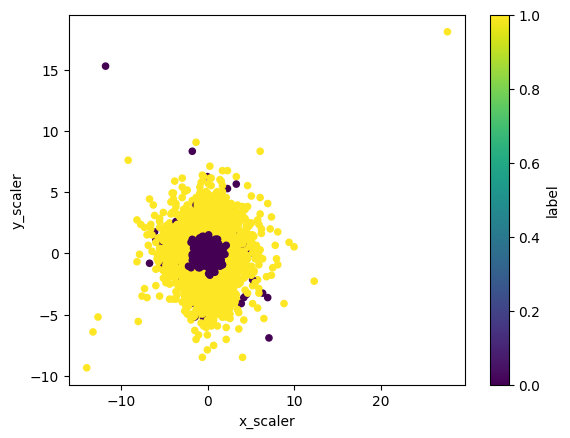

In [88]:
df.plot.scatter(x="x_scaler",y="y_scaler",c="label",  colormap='viridis')

<Axes: xlabel='x_scaler', ylabel='z_scaler'>

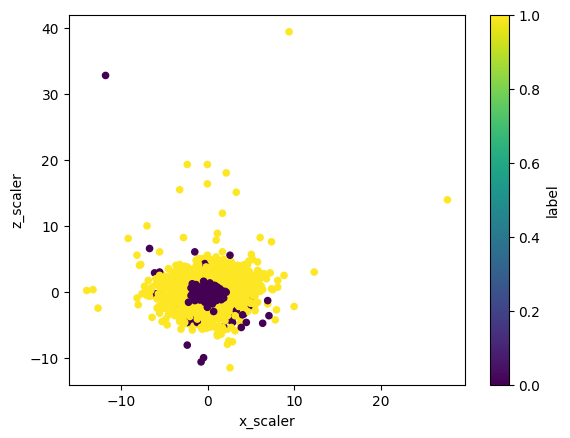

In [89]:
df.plot.scatter(x="x_scaler",y="z_scaler",c="label",  colormap='viridis')

<Axes: xlabel='z_scaler', ylabel='y_scaler'>

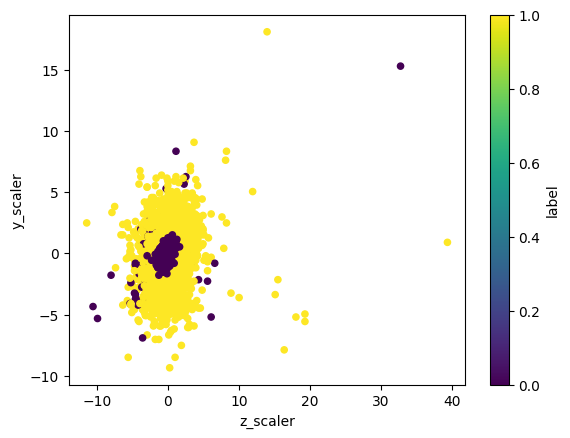

In [90]:
df.plot.scatter(x="z_scaler",y="y_scaler",c="label",  colormap='viridis')

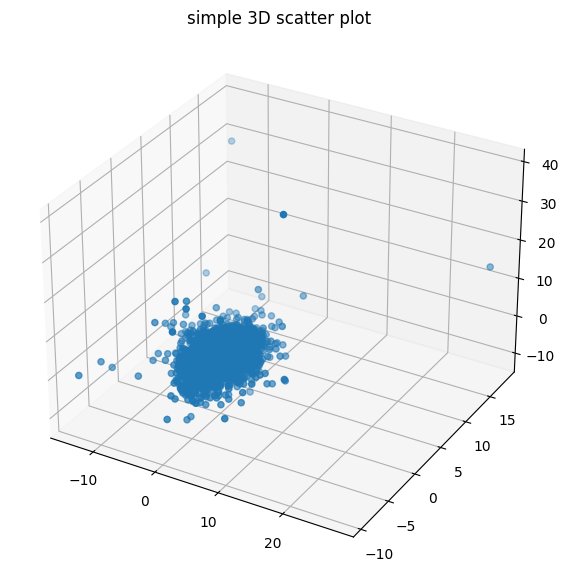

In [91]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
cmhot = plt.get_cmap("hot")
ax.scatter3D(df["x_scaler"], df["y_scaler"], df["z_scaler"])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

Mencari nilai n (minimal_sample) mengunakan Rumus Slovin :

![alternatvie text](./slovin.png)

In [104]:
N = df.label.count()
a = 0.05
n = round(N / (1 + N * (a**2)))
print("minimal_sample :"+ str(n))

minimal_sample :394


Density-Based Spatial Clustering of Application with Noise (DBSCAN) merupakan sebuah metode clustering yang membangun area berdasarkan kepadatan yang terkoneksi (density- connected). Setiap objek dari sebuah radius area (cluster) harus mengandung setidaknya sejumlah minimum data. dalam proses ini saya mengali insight dengan mengunakan model dbscan karena jika di lihat dari pola datanya tercluster di titik pusat

In [93]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
dict = {
    "x_label" : ["x_scaler"],
    "y_label" : ["y_scaler"],
    "z_label" : ["z_scaler"],
    "yz_label" : ["y_scaler","z_scaler"],
    "xz_label" : ["x_scaler","z_scaler"],
    "yx_label" : ["y_scaler","x_scaler"],
    "xyz_label" : ["x_scaler","y_scaler","z_scaler"],
}

for i in dict:
    print(i)
    X = df[dict[i]].copy()
    labels = DBSCAN(eps=0.3, min_samples=n).fit_predict(X)
    df[i] = (labels+1)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
df.head()
df.corr().sort_values("label")

x_label
Estimated number of clusters: 1
Estimated number of noise points: 747
y_label
Estimated number of clusters: 1
Estimated number of noise points: 917
z_label
Estimated number of clusters: 1
Estimated number of noise points: 594
yz_label
Estimated number of clusters: 1
Estimated number of noise points: 5507
xz_label
Estimated number of clusters: 1
Estimated number of noise points: 5986
yx_label
Estimated number of clusters: 1
Estimated number of noise points: 6633
xyz_label
Estimated number of clusters: 1
Estimated number of noise points: 12136


,x,y,z,label,timeepoch,x_scaler,y_scaler,z_scaler,x_label,y_label,z_label,yz_label,xz_label,yx_label,xyz_label
xyz_label,0.027208,0.000854,-0.084615,-0.599612,0.298205,0.027208,0.000854,-0.084615,0.190248,0.211439,0.169183,0.567742,0.598212,0.639005,1.000000
yx_label,0.016949,0.058848,-0.075045,-0.467219,0.256930,0.016949,0.058848,-0.075045,0.297726,0.330887,0.207181,0.626173,0.724953,1.000000,0.639005
yz_label,-0.007855,0.067786,-0.122777,-0.432648,0.229688,-0.007855,0.067786,-0.122777,0.205423,0.372421,0.297992,1.000000,0.590048,0.626173,0.567742
xz_label,0.008138,-0.041821,-0.138810,-0.431392,0.243706,0.008138,-0.041821,-0.138810,0.318028,0.235254,0.282814,0.590048,1.000000,0.724953,0.598212
y_label,-0.025337,0.035088,-0.070311,-0.170338,0.121586,-0.025337,0.035088,-0.070311,0.124315,1.000000,0.216896,0.372421,0.235254,0.330887,0.211439
x_label,-0.060753,-0.042709,-0.072293,-0.145897,0.109861,-0.060753,-0.042709,-0.072293,1.000000,0.124315,0.177389,0.205423,0.318028,0.297726,0.190248
timeepoch,-0.019737,-0.046681,0.161026,-0.131061,1.000000,-0.019737,-0.046681,0.161026,0.109861,0.121586,0.102559,0.229688,0.243706,0.256930,0.298205
z_label,-0.000296,0.000656,-0.019884,-0.121570,0.102559,-0.000296,0.000656,-0.019884,0.177389,0.216896,1.000000,0.297992,0.282814,0.207181,0.169183
y_scaler,0.001602,1.000000,0.186730,-0.026689,-0.046681,0.001602,1.000000,0.186730,-0.042709,0.035088,0.000656,0.067786,-0.041821,0.058848,0.000854
y,0.001602,1.000000,0.186730,-0.026689,-0.046681,0.001602,1.000000,0.186730,-0.042709,0.035088,0.000656,0.067786,-0.041821,0.058848,0.000854


Dari hasil cluster dengan mengabungkan beberapa feature di antaranya xz, xy, yz, dan xyz terdapat korelasi yang cukup tinggi pada feature xyz_label yang mempengaruhi feature independen (label) sebesar -0.6 (pembultan)

cluster ikan yang lebih banyak diam / minim pegerakan :


x        y        z      label
      min max  min  max min max  count
label                                 
0      -6   4  238  252  32  49  12339
1      -6   4  238  252  32  49   3917


Dari pengamatan data di atas, frekeunsi data label 0 (ikan tidak sedang makan) memiliki frekensi yang besar di bandingkan label 1 (ikan sedang makan),
dimana label 0 terdapat 12.339 data sedangkan label 1 ada 3.917 data, dengan keterangan pergerakan ikan
x = -6 ~ 4
y = 238	~ 252
z = 32 ~ 49	 
Dari 14.196 jumlah data yang ber label 0, di dapati 12.339 data ikan label 0 (ikan tidak sedang makan) dengan kreteria pergerak seperti diatas,
yang berarti +-84% ikan tidak sedang makan tidak banyak melakukan pergerakan



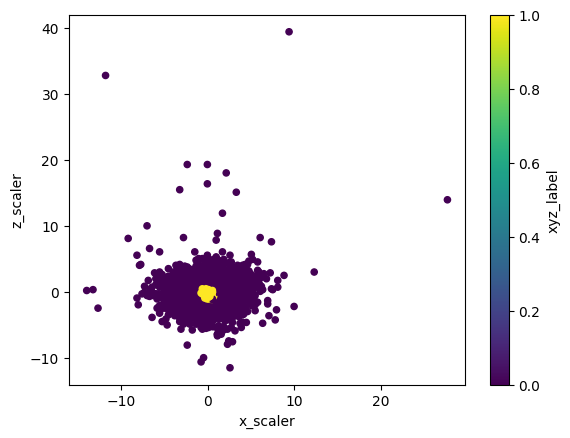

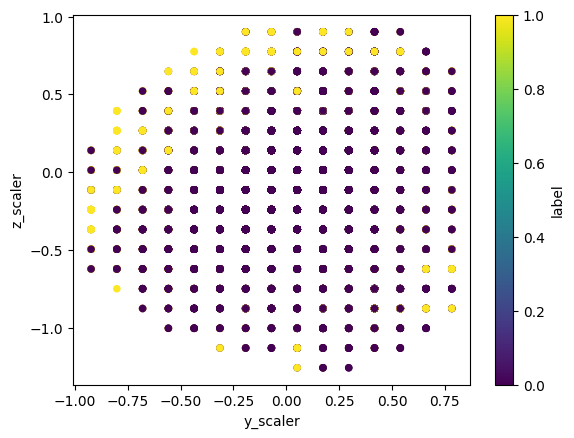

In [108]:

df.plot.scatter(x="x_scaler",y="z_scaler",c="xyz_label",  colormap='viridis')
df[df.xyz_label == 1].plot.scatter(x="y_scaler",y="z_scaler",c="label",  colormap='viridis')
xyz_1 = df[df.xyz_label == 1].groupby("label").agg({
    "x" : ["min","max"],
    "y" : ["min","max"],
    "z" : ["min","max"],
    "label" : ["count"],
})
print("cluster ikan yang lebih banyak diam / minim pegerakan :")
display(xyz_1)
print("""
Dari pengamatan data di atas, frekeunsi data label 0 (ikan tidak sedang makan) memiliki frekensi yang besar di bandingkan label 1 (ikan sedang makan),
dimana label 0 terdapat 12.339 data sedangkan label 1 ada 3.917 data, dengan keterangan pergerakan ikan
x = -6 ~ 4
y = 238	~ 252
z = 32 ~ 49	 
Dari 14.196 jumlah data yang ber label 0, di dapati 12.339 data ikan label 0 (ikan tidak sedang makan) dengan kreteria pergerak seperti diatas,
yang berarti +-84% ikan tidak sedang makan tidak banyak melakukan pergerakan
""")



x        y       label
      min max  min  max  count
label                         
0      -9   7  234  258  13686
1      -9   7  234  258   8073

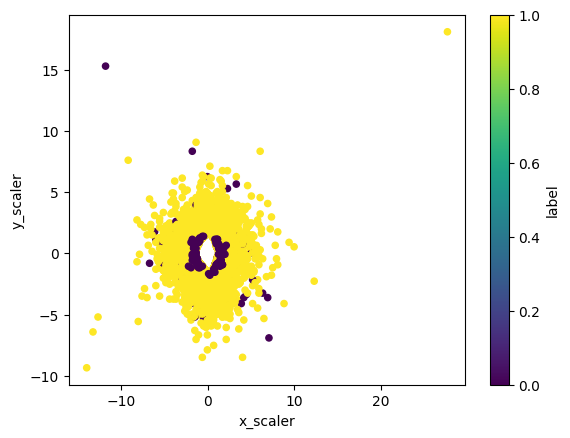

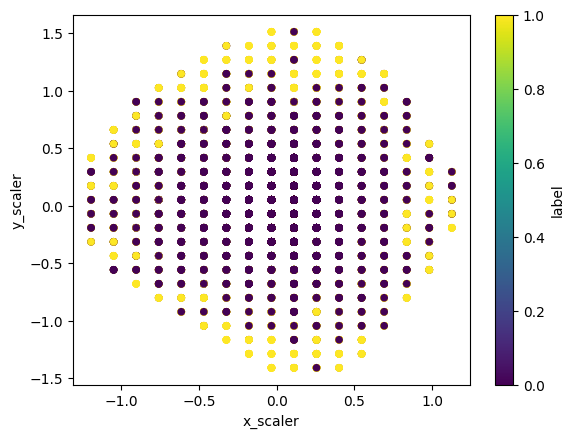

In [113]:
df[df.yx_label == 0].plot.scatter(x="x_scaler",y="y_scaler",c="label",  colormap='viridis')
df[df.yx_label == 1].plot.scatter(x="x_scaler",y="y_scaler",c="label",  colormap='viridis')
yx_1 = df[df.yx_label == 1].groupby("label").agg({
    "x" : ["min","max"],
    "y" : ["min","max"],
    "label" : ["count"],
})
yx_1

y        z      label
       min  max min max  count
label                         
0      235  256  31  53  13871
1      235  256  31  53   9014

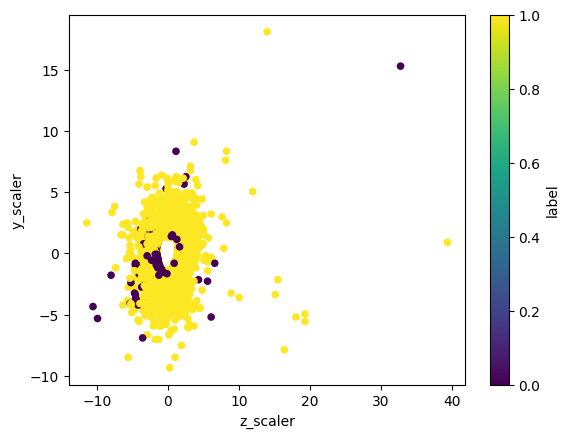

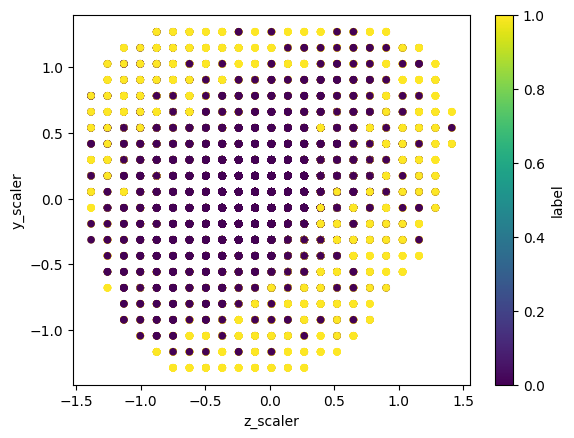

In [116]:
df[df.yz_label == 0].plot.scatter(x="z_scaler",y="y_scaler",c="label",  colormap='viridis')
df[df.yz_label == 1].plot.scatter(x="z_scaler",y="y_scaler",c="label",  colormap='viridis')
yz_1 = df[df.yz_label == 1].groupby("label").agg({
    "y" : ["min","max"],
    "z" : ["min","max"],
    "label" : ["count"],
})
yz_1

x       z      label
      min max min max  count
label                       
0      -9   7  30  53  13701
1      -9   7  30  53   8705

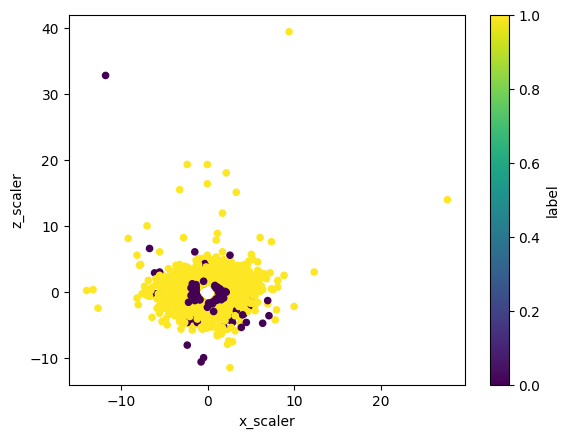

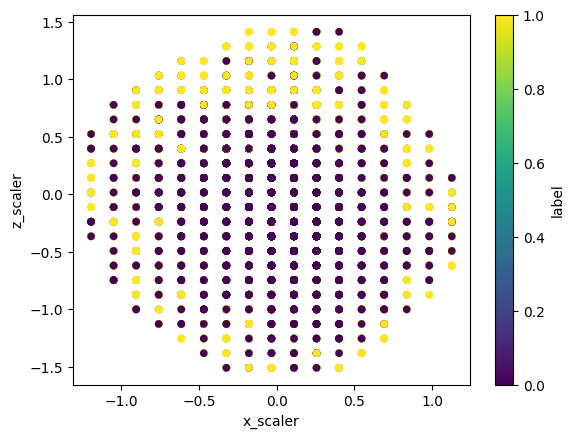

In [115]:
df[df.xz_label == 0].plot.scatter(x="x_scaler",y="z_scaler",c="label",  colormap='viridis')
df[df.xz_label == 1].plot.scatter(x="x_scaler",y="z_scaler",c="label",  colormap='viridis')
xz_1 = df[df.xz_label == 1].groupby("label").agg({
    "x" : ["min","max"],
    "z" : ["min","max"],
    "label" : ["count"],
})
xz_1